# Communicating with Data in the Tidyverse

https://learn.datacamp.com/courses/communicating-with-data-in-the-tidyverse

In [2]:
library(ggplot2)
library(dplyr)

options(jupyter.plot_mimetypes = 'image/svg+xml') # for better graphics

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [15]:
load(url('https://assets.datacamp.com/production/repositories/1464/datasets/a252b4b4a25229cb654fc4e4864cb1ea78e68c03/ilo_hourly_compensation.RData'))

In [21]:
head(ilo_hourly_compensation)

country,year,hourly_compensation
Australia,1980.0,8.44
Austria,1980.0,8.87
Belgium,1980.0,11.74
Canada,1980.0,8.87
Denmark,1980.0,10.83
Finland,1980.0,8.61


In [22]:
load(url('https://assets.datacamp.com/production/repositories/1464/datasets/49e22cc7d46a440348c920c621e75b0681120edb/ilo_working_hours.RData'))

In [23]:
head(ilo_working_hours)

country,year,working_hours
Australia,1980.0,34.57885
Canada,1980.0,34.85000
Denmark,1980.0,31.89808
Finland,1980.0,35.56346
France,1980.0,35.42308
Iceland,1980.0,35.84615


### Custom ggplot2 themes

#### Join the two data sets together

In [56]:
ilo_data <- ilo_hourly_compensation %>%
  inner_join(ilo_working_hours, by = c('country', 'year')) 

head(ilo_data)

country,year,hourly_compensation,working_hours
Australia,1980.0,8.44,34.57885
Canada,1980.0,8.87,34.85000
Denmark,1980.0,10.83,31.89808
Finland,1980.0,8.61,35.56346
France,1980.0,8.90,35.42308
Italy,1980.0,8.09,35.74635


#### Change variable types

For displaying data in ggplot2 graphics, it is often helpful to convert all the variables to the right data type. Usually, categorical variables like country in this example should be converted to factors before plotting them. You can do so using as.factor(). In your data set, two columns are still of type "character" – use mutate() to turn them into factors.

In [28]:
str(ilo_data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	612 obs. of  4 variables:
 $ country            : chr  "Australia" "Canada" "Denmark" "Finland" ...
 $ year               : chr  "1980.0" "1980.0" "1980.0" "1980.0" ...
 $ hourly_compensation: num  8.44 8.87 10.83 8.61 8.9 ...
 $ working_hours      : num  34.6 34.8 31.9 35.6 35.4 ...


In [59]:
# Turn year and country into a factor
ilo_data_corrected <- ilo_data %>%
  mutate(year = as.factor(as.numeric(year)),
        country = as.factor(country))

str(ilo_data_corrected)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	612 obs. of  4 variables:
 $ country            : Factor w/ 30 levels "Australia","Austria",..: 1 5 7 8 9 15 16 17 22 25 ...
 $ year               : int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ hourly_compensation: num  8.44 8.87 10.83 8.61 8.9 ...
 $ working_hours      : num  34.6 34.8 31.9 35.6 35.4 ...


In [60]:
european_countries <- c("Finland", "France", "Italy", "Norway",
    "Spain", "Sweden", "Switzerland", "United Kingdom",
    "Belgium", "Ireland", "Luxembourg", "Portugal",
    "Netherlands", "Germany", "Hungary", "Austria", "Czech Rep.")

In [63]:
ilo_data <- ilo_data_corrected %>%
    filter(country %in% european_countries)

In [75]:
head(ilo_data)

country,year,hourly_compensation,working_hours
Finland,1980,8.61,35.56346
France,1980,8.90,35.42308
Italy,1980,8.09,35.74635
Norway,1980,11.80,30.37885
Spain,1980,5.86,36.77692
Sweden,1980,12.40,29.16923


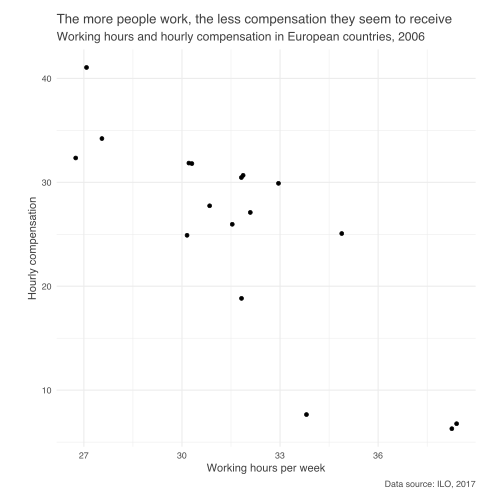

In [74]:
plot_data <- ilo_data %>%
  filter(year == '2006')

ilo_plot <- ggplot(plot_data) +
  geom_point(aes(x = working_hours, y = hourly_compensation)) +
  labs(
    x = "Working hours per week",
    y = "Hourly compensation",
    title = "The more people work, the less compensation they seem to receive",
    subtitle = "Working hours and hourly compensation in European countries, 2006",
    caption = "Data source: ILO, 2017"
  )

ilo_plot +
    theme_minimal() +
    theme(
        text = element_text(family = 'Bookman'),
        title = element_text(color = 'gray25'),
        plot.caption = element_text(color = 'gray30'),
        plot.subtitle = element_text(size = 12),
        plot.margin = unit(c(5, 10, 5, 10), units = "mm")
    )

## Creating a custom and unique visualization

In [76]:
ilo_data <- ilo_data %>%
  filter(year == '1996' | year == '2006')

Specifying the theme.

In [84]:
theme_ilo <- function() {
    theme_minimal() +
    theme(
        text = element_text(family = "Bookman", color = "gray25"),
        plot.subtitle = element_text(size = 12),
        plot.caption = element_text(color = "gray30"),
        plot.margin = unit(c(5, 10, 5, 10), units = "mm")
    )
}

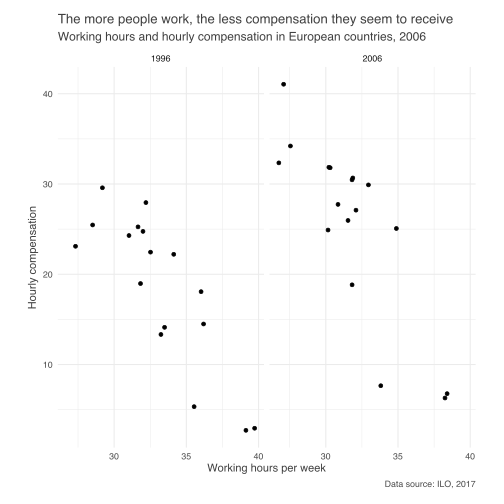

In [85]:
ilo_plot <- ggplot(ilo_data, aes(x = working_hours, y = hourly_compensation)) +
  geom_point() +
   labs(
    x = "Working hours per week",
    y = "Hourly compensation",
    title = "The more people work, the less compensation they seem to receive",
    subtitle = "Working hours and hourly compensation in European countries, 2006",
    caption = "Data source: ILO, 2017"
  ) +
  # Add facets
  facet_grid(facets = . ~ year)

ilo_plot + theme_ilo()

In [87]:
ilo_data <- ilo_data %>%
    arrange(country)

head(ilo_data)

country,year,hourly_compensation,working_hours
Austria,1996,24.75,31.99808
Austria,2006,30.46,31.81731
Belgium,1996,25.25,31.65385
Belgium,2006,31.85,30.21154
Czech Rep.,1996,2.94,39.72692
Czech Rep.,2006,6.77,38.40000


#### Basic dot plot

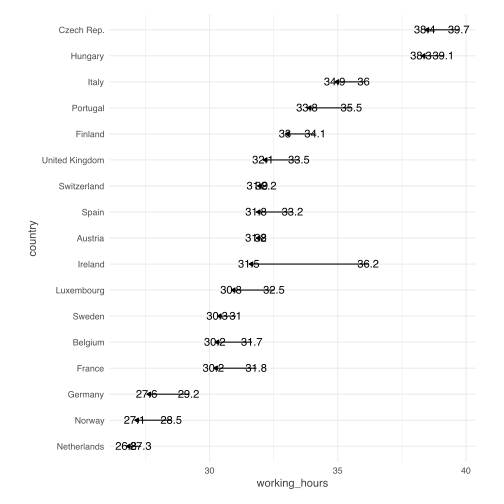

In [112]:
ilo_plot <- ggplot(ilo_data) +
    geom_path(
        aes(x = working_hours, y = country),
        arrow = arrow(length = unit(1.5, "mm"), type = "closed")
    ) +
    geom_text(
        aes(x = working_hours,
              y = country,
              label = round(working_hours, 1))
    )

ilo_plot + theme_ilo()

In [94]:
library(forcats)

In [96]:
ilo_data <- ilo_data %>%
  arrange(year) %>%
  # Reorder countries by working hours in 2006
  mutate(country = fct_reorder(country, working_hours, last))

head(ilo_data)

country,year,hourly_compensation,working_hours
Austria,1996,24.75,31.99808
Belgium,1996,25.25,31.65385
Czech Rep.,1996,2.94,39.72692
Finland,1996,22.21,34.12692
France,1996,18.97,31.82692
Germany,1996,29.58,29.18846


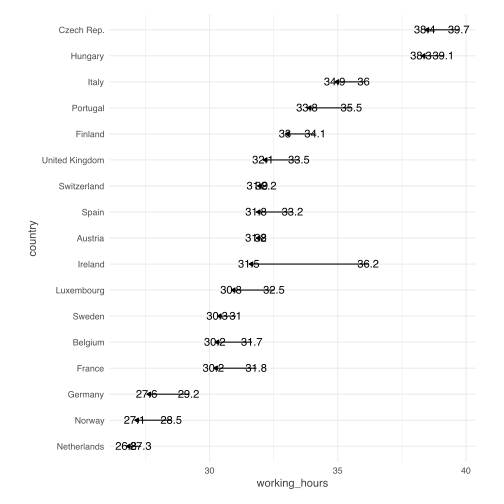

In [118]:
ggplot(ilo_data) +
    geom_path(
        aes(x = working_hours, y = country),
        arrow = arrow(length = unit(1.5, "mm"), type = "closed")
    ) +
    geom_text(
        aes(x = working_hours,
            y = country,
            label = round(working_hours, 1))
    ) + 
    theme_ilo()

The labels still kind of overlap with the lines in the dot plot. Let's change that.

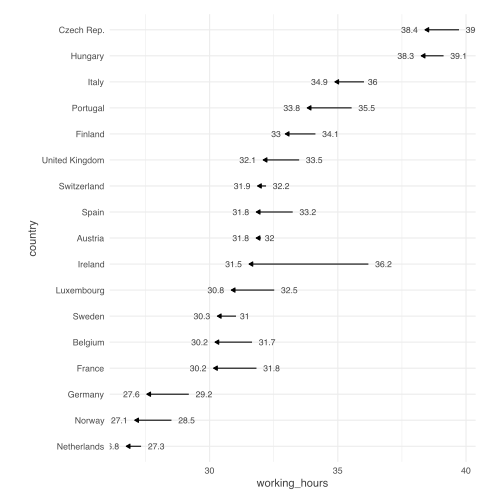

In [123]:
ilo_dot_plot <- ggplot(ilo_data) +
    geom_path(
        aes(x = working_hours, y = country),
        arrow = arrow(length = unit(1.5, "mm"), type = "closed")
    ) +
    geom_text(
        aes(x = working_hours,
            y = country,
            label = round(working_hours, 1),
            hjust = ifelse(year == "2006", 1.4, -0.4)
        ),
        # Change the appearance of the text
        size = 3,
        family = "Bookman",
        color = "gray25"
        ) + 
    theme_ilo()

ilo_dot_plot

Let's change the viewport so labels don't overlap with plot border.

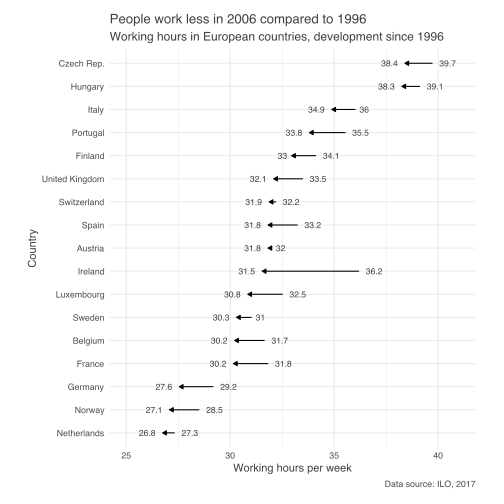

In [128]:
ilo_dot_plot <- ilo_dot_plot +
    labs(
    x = "Working hours per week",
    y = "Country",
    title = "People work less in 2006 compared to 1996",
    subtitle = "Working hours in European countries, development since 1996",
    caption = "Data source: ILO, 2017"
    ) + 
    # Change the viewport
    coord_cartesian(xlim = c(25, 41))

ilo_dot_plot

#### Optimizing the plot for mobile devices

You're going to encounter something that is probably new to you: New data sets can be given to single geometries like geom_text(), so these geometries don't use the data set given to the initial ggplot() call. In this exercise, you are going to need this because you only want to add one label to each arrow. If you were to use the original data set ilo_data, two labels would be added because there are two observations for each country in the data set, one for 1996 and one for 2006.

## Introduction to RMarkdown

In [125]:
# Compute temporary data set for optimal label placement
median_working_hours <- ilo_data %>%
  group_by(country) %>%
  summarize(median_working_hours_per_country = median(working_hours)) %>%
  ungroup()

str(median_working_hours)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	17 obs. of  2 variables:
 $ country                         : Factor w/ 30 levels "Netherlands",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ median_working_hours_per_country: num  27 27.8 28.4 31 30.9 ...


In [127]:
head(median_working_hours)

country,median_working_hours_per_country
Netherlands,27.03846
Norway,27.79615
Germany,28.37019
France,30.99135
Belgium,30.93269
Sweden,30.66615


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


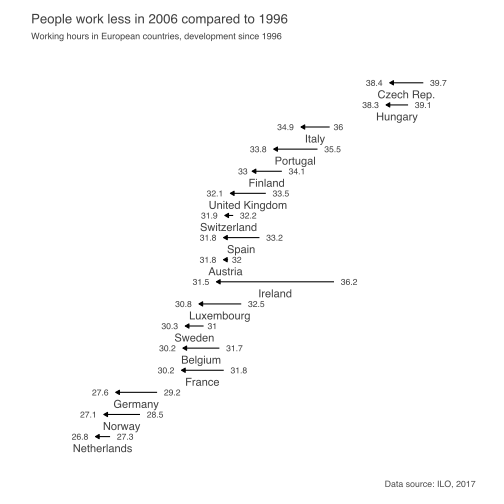

In [137]:
ilo_dot_plot +
    # Add label for country
    geom_text(
        data = median_working_hours,
        aes(
            y = country,
            x = median_working_hours_per_country,
            label = country
        ),
        vjust = 2,
        family = "Bookman",
        color = "gray25") +
    # Remove axes and grids
    theme(
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        axis.text = element_blank(),
        panel.grid = element_blank(),
        # Reduce the font size of the subtitle
        plot.subtitle = element_text(size = 9)
    ) + 
    coord_cartesian(ylim = c(0, 18), xlim = c(25, 41))